In [1]:
import os
import findspark
findspark.init() # findspark sekarang sudah terinstal, jadi ini akan berhasil!

from pyspark.sql import SparkSession

os.environ["SPARK_LOCAL_IP"] = "127.0.0.1"

spark = SparkSession.builder \
    .appName("BigDataPractice") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

print("Spark success!")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/23 22:16:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Spark success!


In [2]:
#Setup Spark dan DataFrame 
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, count

spark = SparkSession.builder.appName("Tugas1_Department").getOrCreate()

data = [
    ('Aisyah', 'Sales', 34, 5000),
    ('Tegar', 'Sales', 40, 6000),
    ('Tiffany', 'IT', 28, 7000),
    ('Bagas', 'IT', 35, 6500),
    ('Nayla', 'HR', 30, 4800),
    ('Farzan', 'HR', 45, 5200)
]

columns = ['name', 'department', 'age', 'salary']
df = spark.createDataFrame(data, columns)

df.createOrReplaceTempView("employees")

25/10/23 22:22:31 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [3]:
#Query Spark SQL
result = spark.sql("""
SELECT department,
       SUM(salary) AS total_salary,
       COUNT(*) AS total_employees
FROM employees
GROUP BY department
""")

result.show()

+----------+------------+---------------+
|department|total_salary|total_employees|
+----------+------------+---------------+
|     Sales|       11000|              2|
|        IT|       13500|              2|
|        HR|       10000|              2|
+----------+------------+---------------+



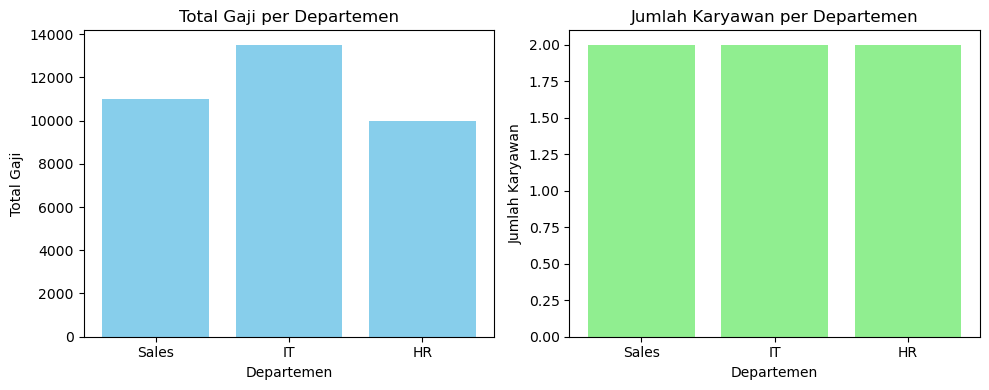

In [4]:
#Visualisasi perbandingan berdampingan
import pandas as pd
import matplotlib.pyplot as plt

pandas_df = result.toPandas()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].bar(pandas_df['department'], pandas_df['total_salary'], color='skyblue')
axes[0].set_title('Total Gaji per Departemen')
axes[0].set_xlabel('Departemen')
axes[0].set_ylabel('Total Gaji')

axes[1].bar(pandas_df['department'], pandas_df['total_employees'], color='lightgreen')
axes[1].set_title('Jumlah Karyawan per Departemen')
axes[1].set_xlabel('Departemen')
axes[1].set_ylabel('Jumlah Karyawan')

plt.tight_layout()
plt.show()

In [5]:
#Setup Spark dan DataFrame
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col

spark = SparkSession.builder.appName("Tugas2_Karyawan").getOrCreate()

data = [
    ('Aisyah', 34, 5000),
    ('Tegar', 40, 6000),
    ('Tiffany', 28, 7000),
    ('Bagas', 35, 6500),
    ('Nayla', 30, 4800),
    ('Duta', 45, 5200),
    ('Taufiq', 25, 7200),
    ('Ikhsan', 32, 5800)
]

df = spark.createDataFrame(data, ['Nama', 'Umur', 'Gaji'])

df = df.withColumn(
    'Kelompok_Umur',
    when(col('Umur') <= 30, 'Muda')
    .when((col('Umur') > 30) & (col('Umur') <= 40), 'Dewasa')
    .otherwise('Senior')
)

df.createOrReplaceTempView("karyawan")


25/10/23 22:32:39 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [9]:
#Hitung rata-rata gaji tiap kelompok usia
avg_gaji = spark.sql("""
SELECT Kelompok_Umur, AVG(Gaji) AS Rata2_Gaji
FROM karyawan
GROUP BY Kelompok_Umur
""")
avg_gaji.createOrReplaceTempView("avg_gaji")

In [8]:
#Ambil karyawan yang gajinya di atas rata-rata kelompoknya

above_avg = spark.sql("""
SELECT k.Nama, k.Kelompok_Umur, k.Gaji, a.Rata2_Gaji
FROM karyawan k
JOIN avg_gaji a ON k.Kelompok_Umur = a.Kelompok_Umur
WHERE k.Gaji > a.Rata2_Gaji
ORDER BY k.Kelompok_Umur
""")

above_avg.show()


+-------+-------------+----+-----------------+
|   Nama|Kelompok_Umur|Gaji|       Rata2_Gaji|
+-------+-------------+----+-----------------+
|  Tegar|       Dewasa|6000|           5825.0|
|  Bagas|       Dewasa|6500|           5825.0|
|Tiffany|         Muda|7000|6333.333333333333|
| Taufiq|         Muda|7200|6333.333333333333|
+-------+-------------+----+-----------------+



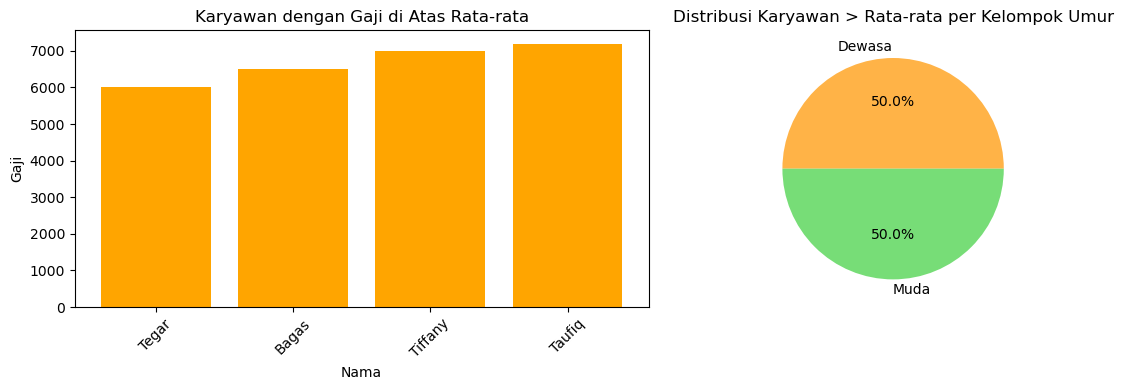

In [10]:
#Bagian Visualisasi 
import pandas as pd
import matplotlib.pyplot as plt

df_plot = above_avg.toPandas()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(df_plot['Nama'], df_plot['Gaji'], color='orange')
axes[0].set_title('Karyawan dengan Gaji di Atas Rata-rata')
axes[0].set_xlabel('Nama')
axes[0].set_ylabel('Gaji')
axes[0].tick_params(axis='x', rotation=45)

group_count = df_plot['Kelompok_Umur'].value_counts()
axes[1].pie(group_count, labels=group_count.index, autopct='%1.1f%%', colors=['#ffb347','#77dd77','#aec6cf'])
axes[1].set_title('Distribusi Karyawan > Rata-rata per Kelompok Umur')

plt.tight_layout()
plt.show()

In [20]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Karyawan150Lengkap").getOrCreate()

# Dataset 150 karyawan 
data_karyawan = [
# Sales 
('Agus1','Sales',25,4000),('Budi2','Sales',26,4200),('Cahyo3','Sales',27,4400),
('Dewi4','Sales',28,4600),('Eka5','Sales',29,4800),('Fajar6','Sales',30,5000),
('Gita7','Sales',31,5200),('Hendra8','Sales',32,5400),('Indah9','Sales',33,5600),
('Joko10','Sales',34,5800),('Kiki11','Sales',35,6000),('Lia12','Sales',36,6200),
('Mira13','Sales',37,6400),('Nina14','Sales',38,6600),('Oki15','Sales',39,6800),
('Putri16','Sales',40,7000),('Rina17','Sales',41,7200),('Sari18','Sales',42,7400),
('Tono19','Sales',43,7600),('Umi20','Sales',44,7800),('Vina21','Sales',45,8000),
('Wawan22','Sales',25,4200),('Xaver23','Sales',26,4400),('Yuni24','Sales',27,4600),
('Zaki25','Sales',28,4800),('Agus26','Sales',29,5000),('Budi27','Sales',30,5200),
('Cahyo28','Sales',31,5400),('Dewi29','Sales',32,5600),('Eka30','Sales',33,5800),

# IT 
('Fajar31','IT',25,5000),('Gita32','IT',26,5200),('Hendra33','IT',27,5400),
('Indah34','IT',28,5600),('Joko35','IT',29,5800),('Kiki36','IT',30,6000),
('Lia37','IT',31,6200),('Mira38','IT',32,6400),('Nina39','IT',33,6600),
('Oki40','IT',34,6800),('Putri41','IT',35,7000),('Rina42','IT',36,7200),
('Sari43','IT',37,7400),('Tono44','IT',38,7600),('Umi45','IT',39,7800),
('Vina46','IT',40,8000),('Wawan47','IT',41,8200),('Xaver48','IT',42,8400),
('Yuni49','IT',43,8600),('Zaki50','IT',44,8800),('Agus51','IT',45,9000),
('Budi52','IT',25,5200),('Cahyo53','IT',26,5400),('Dewi54','IT',27,5600),
('Eka55','IT',28,5800),('Fajar56','IT',29,6000),('Gita57','IT',30,6200),
('Hendra58','IT',31,6400),('Indah59','IT',32,6600),('Joko60','IT',33,6800),

# HR 
('Kiki61','HR',25,4000),('Lia62','HR',26,4200),('Mira63','HR',27,4400),
('Nina64','HR',28,4600),('Oki65','HR',29,4800),('Putri66','HR',30,5000),
('Rina67','HR',31,5200),('Sari68','HR',32,5400),('Tono69','HR',33,5600),
('Umi70','HR',34,5800),('Vina71','HR',35,6000),('Wawan72','HR',36,6200),
('Xaver73','HR',37,6400),('Yuni74','HR',38,6600),('Zaki75','HR',39,6800),
('Agus76','HR',40,7000),('Budi77','HR',41,7200),('Cahyo78','HR',42,7400),
('Dewi79','HR',43,7600),('Eka80','HR',44,7800),('Fajar81','HR',45,8000),
('Gita82','HR',25,4200),('Hendra83','HR',26,4400),('Indah84','HR',27,4600),
('Joko85','HR',28,4800),('Kiki86','HR',29,5000),('Lia87','HR',30,5200),
('Mira88','HR',31,5400),('Nina89','HR',32,5600),('Oki90','HR',33,5800),

# Finance 
('Putri91','Finance',25,5000),('Rina92','Finance',26,5200),('Sari93','Finance',27,5400),
('Tono94','Finance',28,5600),('Umi95','Finance',29,5800),('Vina96','Finance',30,6000),
('Wawan97','Finance',31,6200),('Xaver98','Finance',32,6400),('Yuni99','Finance',33,6600),
('Zaki100','Finance',34,6800),('Agus101','Finance',35,7000),('Budi102','Finance',36,7200),
('Cahyo103','Finance',37,7400),('Dewi104','Finance',38,7600),('Eka105','Finance',39,7800),
('Fajar106','Finance',40,8000),('Gita107','Finance',41,8200),('Hendra108','Finance',42,8400),
('Indah109','Finance',43,8600),('Joko110','Finance',44,8800),('Kiki111','Finance',45,9000),
('Lia112','Finance',25,5200),('Mira113','Finance',26,5400),('Nina114','Finance',27,5600),
('Oki115','Finance',28,5800),('Putri116','Finance',29,6000),('Rina117','Finance',30,6200),
('Sari118','Finance',31,6400),('Tono119','Finance',32,6600),('Umi120','Finance',33,6800),

# Marketing 
('Vina121','Marketing',25,4000),('Wawan122','Marketing',26,4200),('Xaver123','Marketing',27,4400),
('Yuni124','Marketing',28,4600),('Zaki125','Marketing',29,4800),('Agus126','Marketing',30,5000),
('Budi127','Marketing',31,5200),('Cahyo128','Marketing',32,5400),('Dewi129','Marketing',33,5600),
('Eka130','Marketing',34,5800),('Fajar131','Marketing',35,6000),('Gita132','Marketing',36,6200),
('Hendra133','Marketing',37,6400),('Indah134','Marketing',38,6600),('Joko135','Marketing',39,6800),
('Kiki136','Marketing',40,7000),('Lia137','Marketing',41,7200),('Mira138','Marketing',42,7400),
('Nina139','Marketing',43,7600),('Oki140','Marketing',44,7800),('Putri141','Marketing',45,8000),
('Rina142','Marketing',25,4200),('Sari143','Marketing',26,4400),('Tono144','Marketing',27,4600),
('Umi145','Marketing',28,4800),('Vina146','Marketing',29,5000),('Wawan147','Marketing',30,5200),
('Xaver148','Marketing',31,5400),('Yuni149','Marketing',32,5600),('Zaki150','Marketing',33,5800)
]

# Membuat DataFrame Spark
df_karyawan = spark.createDataFrame(data_karyawan, ['Nama','Departemen','Umur','Gaji'])
df_karyawan.createOrReplaceTempView("karyawan")
df_karyawan.show(10)



25/10/24 01:04:39 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+-------+----------+----+----+
|   Nama|Departemen|Umur|Gaji|
+-------+----------+----+----+
|  Agus1|     Sales|  25|4000|
|  Budi2|     Sales|  26|4200|
| Cahyo3|     Sales|  27|4400|
|  Dewi4|     Sales|  28|4600|
|   Eka5|     Sales|  29|4800|
| Fajar6|     Sales|  30|5000|
|  Gita7|     Sales|  31|5200|
|Hendra8|     Sales|  32|5400|
| Indah9|     Sales|  33|5600|
| Joko10|     Sales|  34|5800|
+-------+----------+----+----+
only showing top 10 rows



In [21]:
data_departemen = [
    ('Sales','Departemen Penjualan'),
    ('IT','Departemen Teknologi'),
    ('HR','Departemen SDM'),
    ('Finance','Departemen Keuangan'),
    ('Marketing','Departemen Pemasaran')
]

df_departemen = spark.createDataFrame(data_departemen, ['Departemen','NamaDept'])
df_departemen.createOrReplaceTempView("departemen")
df_departemen.show(truncate=False)


+----------+--------------------+
|Departemen|NamaDept            |
+----------+--------------------+
|Sales     |Departemen Penjualan|
|IT        |Departemen Teknologi|
|HR        |Departemen SDM      |
|Finance   |Departemen Keuangan |
|Marketing |Departemen Pemasaran|
+----------+--------------------+



In [22]:
analisis_mendalam = spark.sql("""
SELECT k.Departemen, d.NamaDept,
       COUNT(*) AS Jumlah_Karyawan,
       AVG(k.Gaji) AS RataRata_Gaji,
       SUM(k.Gaji) AS Total_Gaji,
       MIN(k.Gaji) AS Gaji_Terendah,
       MAX(k.Gaji) AS Gaji_Tertinggi
FROM karyawan k
JOIN departemen d ON k.Departemen = d.Departemen
GROUP BY k.Departemen, d.NamaDept
ORDER BY Total_Gaji DESC
""")
analisis_mendalam.show(truncate=False)


+----------+--------------------+---------------+-------------+----------+-------------+--------------+
|Departemen|NamaDept            |Jumlah_Karyawan|RataRata_Gaji|Total_Gaji|Gaji_Terendah|Gaji_Tertinggi|
+----------+--------------------+---------------+-------------+----------+-------------+--------------+
|Finance   |Departemen Keuangan |30             |6700.0       |201000    |5000         |9000          |
|IT        |Departemen Teknologi|30             |6700.0       |201000    |5000         |9000          |
|HR        |Departemen SDM      |30             |5700.0       |171000    |4000         |8000          |
|Marketing |Departemen Pemasaran|30             |5700.0       |171000    |4000         |8000          |
|Sales     |Departemen Penjualan|30             |5700.0       |171000    |4000         |8000          |
+----------+--------------------+---------------+-------------+----------+-------------+--------------+



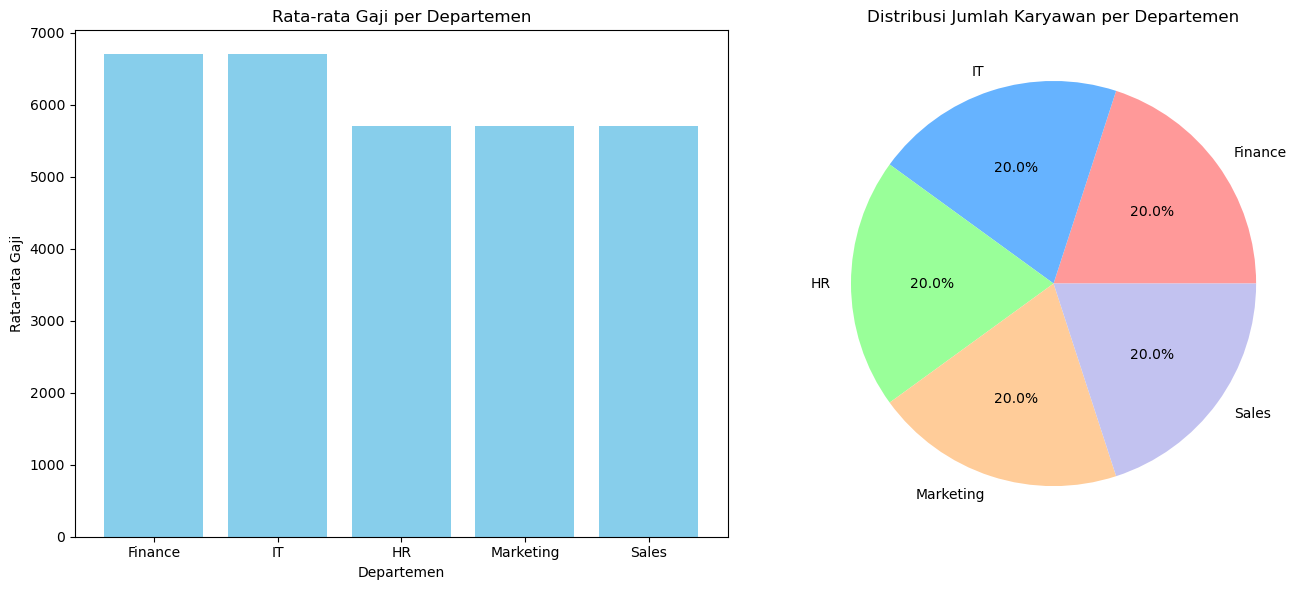

In [23]:
import matplotlib.pyplot as plt

df_plot = analisis_mendalam.toPandas()

fig, axes = plt.subplots(1,2,figsize=(14,6))

axes[0].bar(df_plot['Departemen'], df_plot['RataRata_Gaji'], color='skyblue')
axes[0].set_title('Rata-rata Gaji per Departemen')
axes[0].set_xlabel('Departemen')
axes[0].set_ylabel('Rata-rata Gaji')

axes[1].pie(df_plot['Jumlah_Karyawan'], labels=df_plot['Departemen'], autopct='%1.1f%%',
            colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
axes[1].set_title('Distribusi Jumlah Karyawan per Departemen')

plt.tight_layout()
plt.show()
